# LINEAR REGRESSION ASSIGNMENT

### Problem Statement

BoomBikes, a US-based bike-sharing service, has faced revenue losses due to the COVID-19 pandemic. To recover, the company aims to understand the factors influencing bike demand and develop a predictive model to forecast future demand.

The dataset includes daily bike demand records along with various factors like weather and user behavior. The task is to build a multiple linear regression model to identify significant variables affecting demand and quantify their impact.

This analysis will help BoomBikes optimize its operations, align strategies with customer needs, and gain a competitive edge post-lock-down. The below model will provide a solution for the given problem

##### Import the required libraries for easier analysis

In [691]:
## Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score


### STEP 1: Reading and Understanding the dataset

In [693]:
##Read the data

biking = pd.read_csv("day.csv")

biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [694]:
biking.shape   ##check the number of rows and columns in the dataset

(730, 16)

In [695]:
biking.info()  ### to check if there are any null values in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


here there are no null values

In [696]:
# Replace numeric encodings with descriptive labels
biking['season'] = biking['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
biking['weathersit'] = biking['weathersit'].map({
    1: 'Clear or Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Snow'
})

##converted into categorical data

In [697]:
biking.info() ##checking if the typecasting has worked properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


Dropping Columns that are not much of relevance to the model

Drop Instant column - as it is just like index
Drop Dteday column as the date is in string type. The time based trends proves to be useful. But this format is not usable
also we have yr and mnth for analysis in the right type. Hence we can use them to build the model
The target variable is cnt, hence I have dropped Casual and Registered since they add up to cnt. using Casual and Registered will inflate the target model performance. 

In [698]:
# Drop irrelevant columns
biking = biking.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [699]:
biking.head() #here is the final cleaned data which I am going to use for analysis

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,3,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,4,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,5,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [700]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


### Creating Dummy Variables

In [701]:
# One-hot encoding for categorical variables
seasons =  pd.get_dummies(biking['season'],drop_first = True)
seasons=seasons.astype(int)

In [702]:
weather =  pd.get_dummies(biking['weathersit'], drop_first = True)
weather=weather.astype(int)
biking = pd.concat([biking, weather,seasons], axis = 1)

In [703]:
biking

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Light Snow or Rain,Mist + Cloudy,Spring,Summer,Winter
0,Spring,0,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,Spring,0,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,Spring,0,1,0,3,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,Spring,0,1,0,4,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,Spring,0,1,0,5,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,12,0,5,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,2114,0,1,1,0,0
726,Spring,1,12,0,6,0,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,3095,0,1,1,0,0
727,Spring,1,12,0,0,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,1341,0,1,1,0,0
728,Spring,1,12,0,1,1,Clear or Partly Cloudy,10.489153,11.58500,48.3333,23.500518,1796,0,0,1,0,0


### Step 2: Visualization of the Dataset

I have already imported the required lib like matplot and seaborn

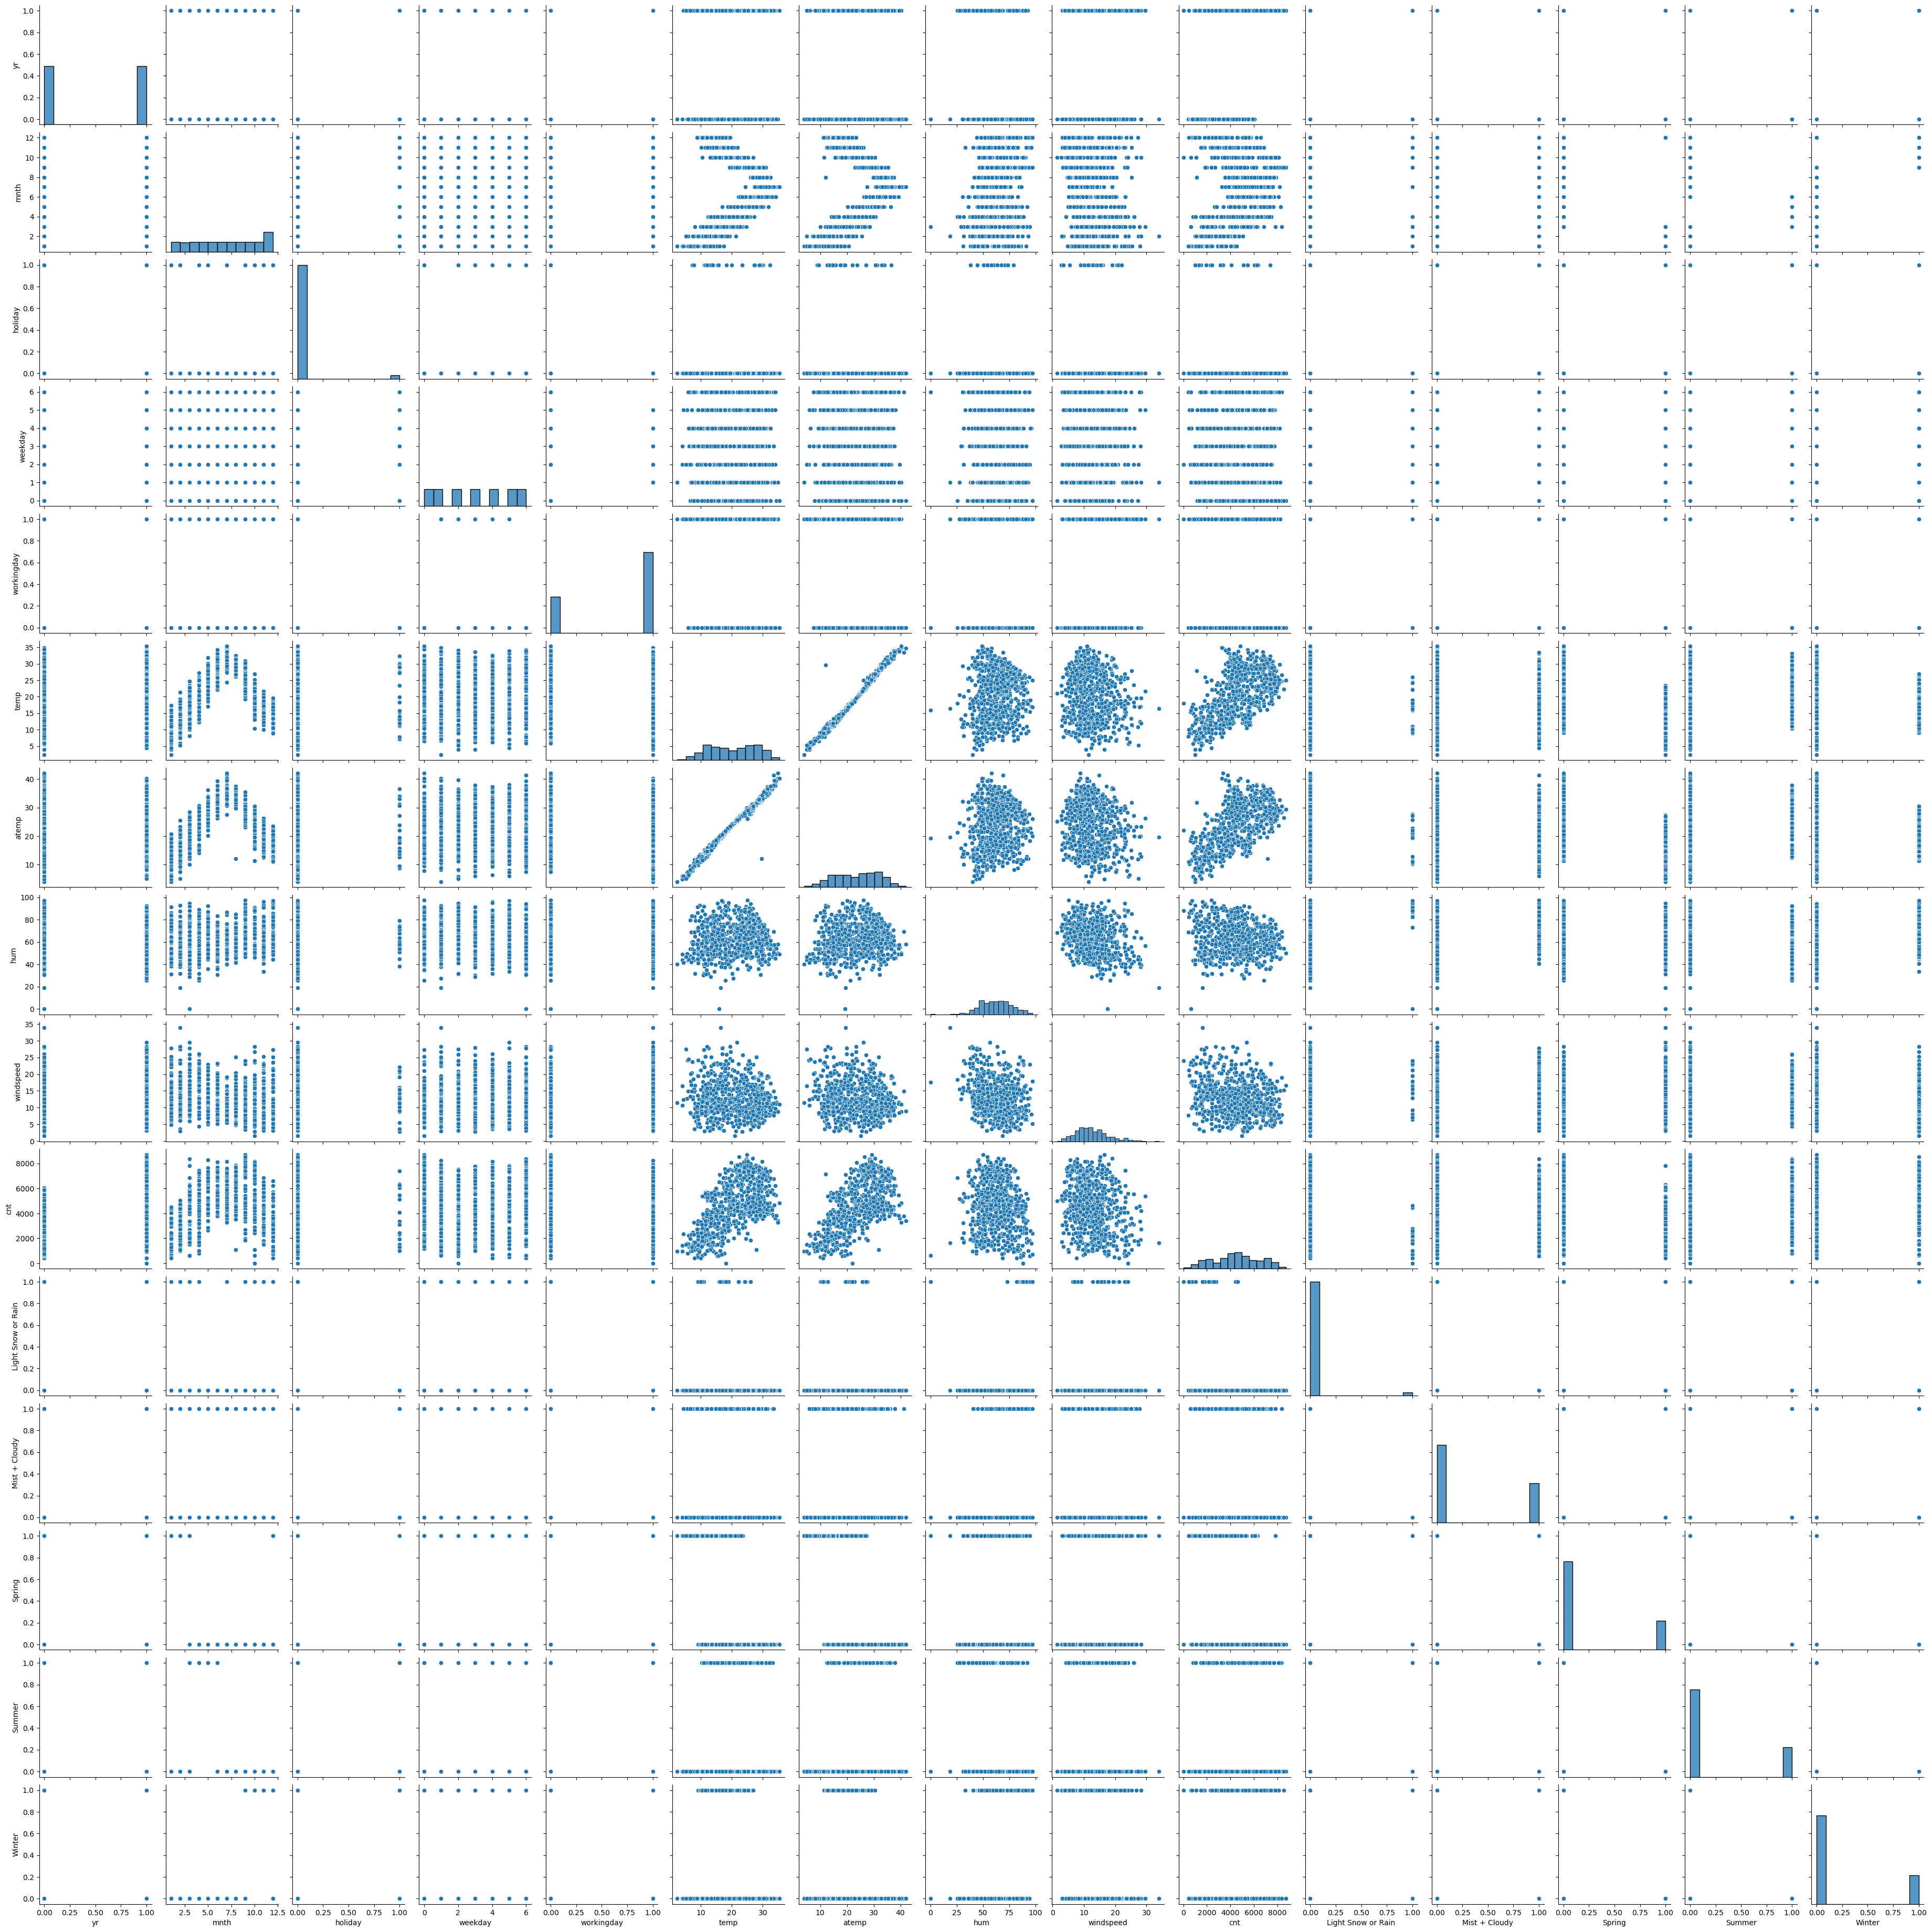

In [704]:
sns.pairplot(biking)

### Exploratory Data Analysis

We will perform univariate, Bi variate and Multi-variate analysis for the following data set

Univariate analysis is useful to identify the distribution of each individual variable. 

Distribution of Temp and atemp shows a normal curve were the peaks there is a highest distribution between 10-30 values. 
Distribution of Humidity shows there is a skewness in the highest humidity levels
Windspeed has been skewed in the lowest levels. The Cnt count of bikes or number of bikes has been distributed higher in the average values

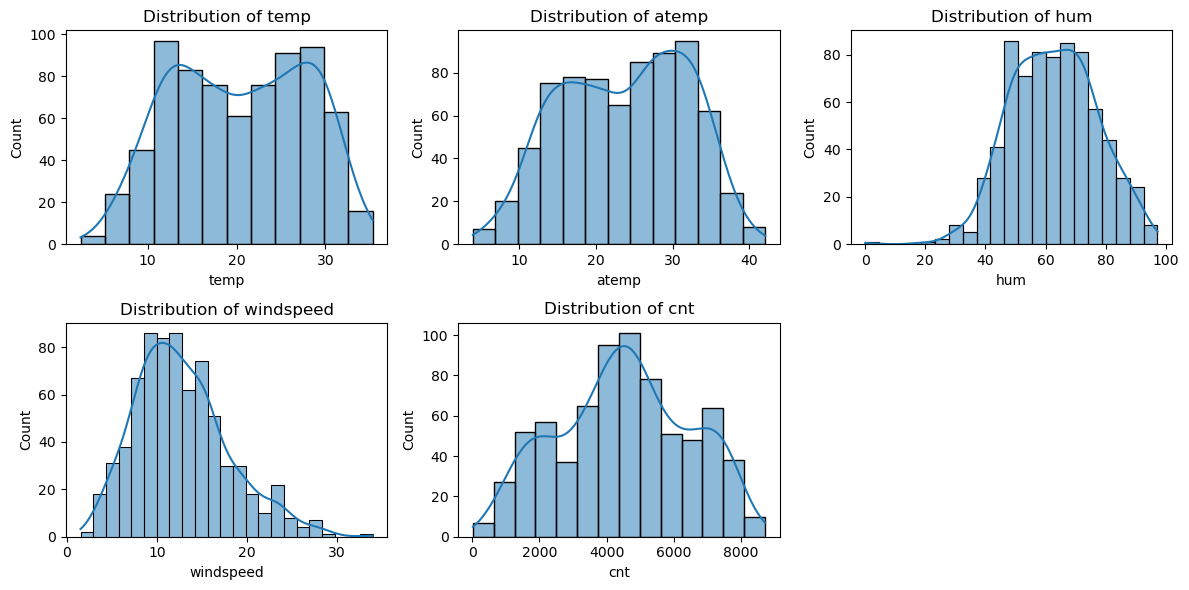

In [705]:
### Lets Analyse other variables like Temp, atemp,hum,windspeed and cnt

plt.figure(figsize=(12, 6))
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed', 'cnt']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(biking[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


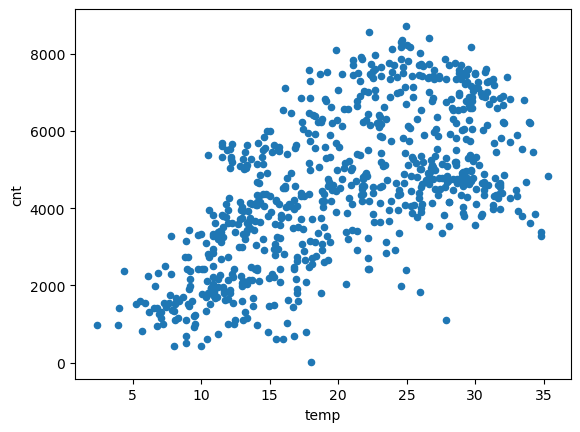

In [706]:
biking.plot.scatter(x='temp',y="cnt")
plt.show()

Here when the temp is higher the cnt of bikes is also higher. When the temp is between 20-30 the usage of bikes is higher

#### Bivariate Analysis

Bivariate analysis examines the relationship between two variables to understand how they influence one another. It is an essential step in exploratory data analysis (EDA) and provides insights into potential patterns or associations. 

<Figure size 1200x600 with 0 Axes>

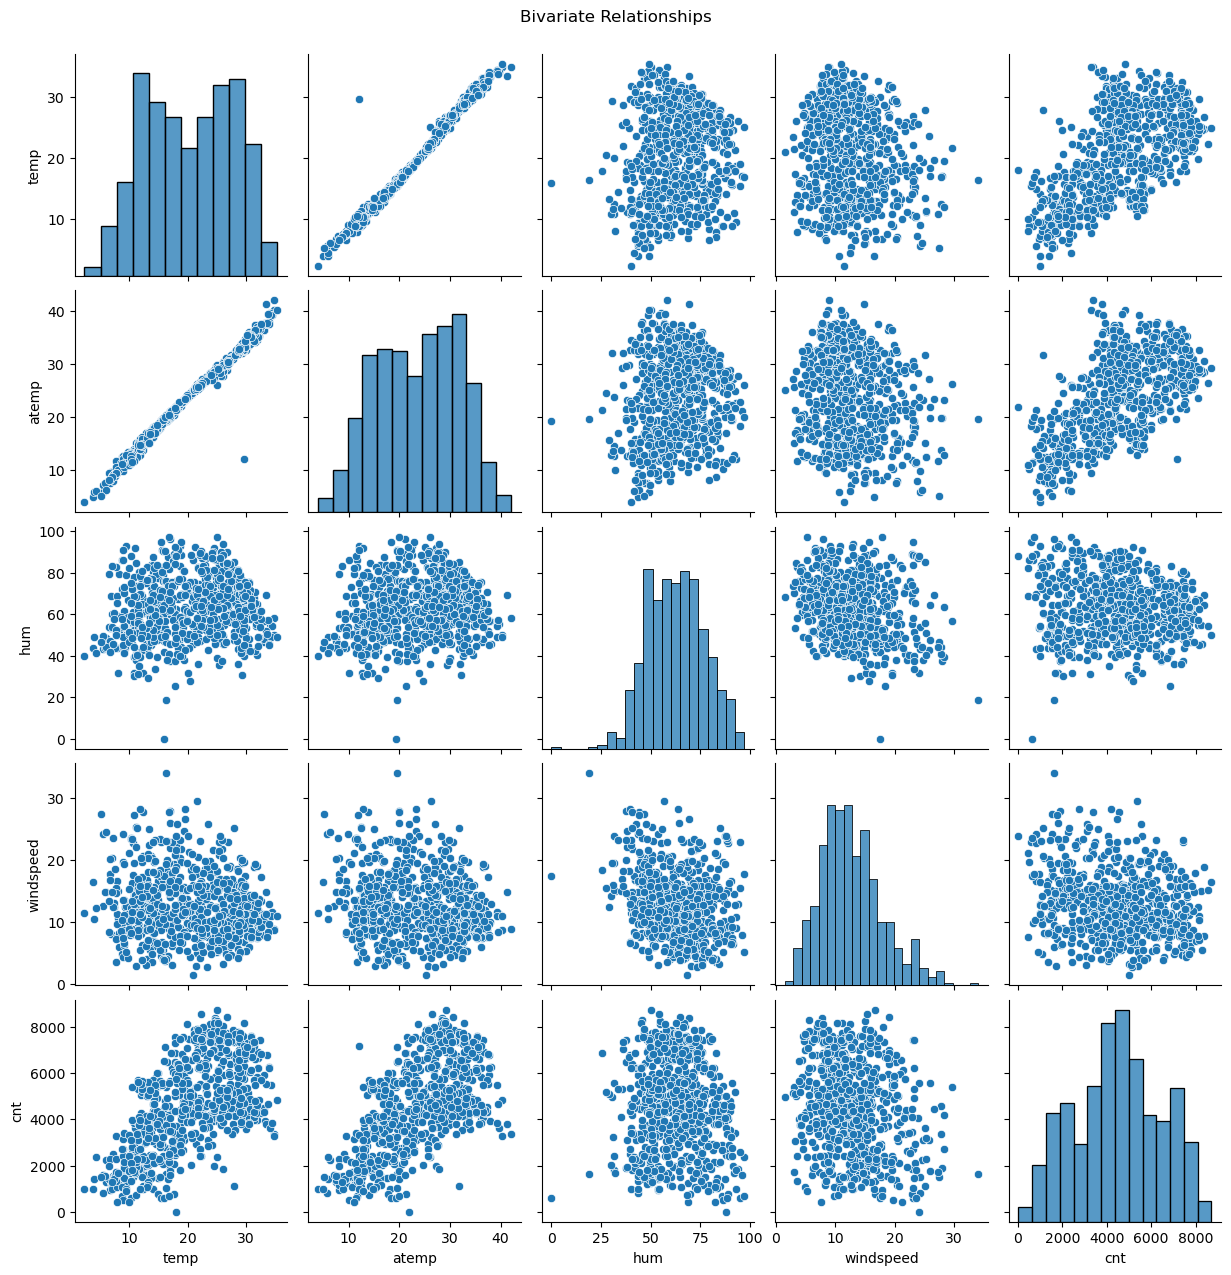

In [707]:
plt.figure(figsize=(12, 6))
sns.pairplot(biking[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.suptitle('Bivariate Relationships', y=1.02)
plt.show()

In [708]:
biking = biking.drop(columns=["season","weathersit"]) # dropping columns that are no longer needed as the dummy variables have been created for analysis

In [709]:
biking.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow or Rain,Mist + Cloudy,Spring,Summer,Winter
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


#### Multivariate Analysis

The heat map below will depict the corr between all the variables of the dataset 

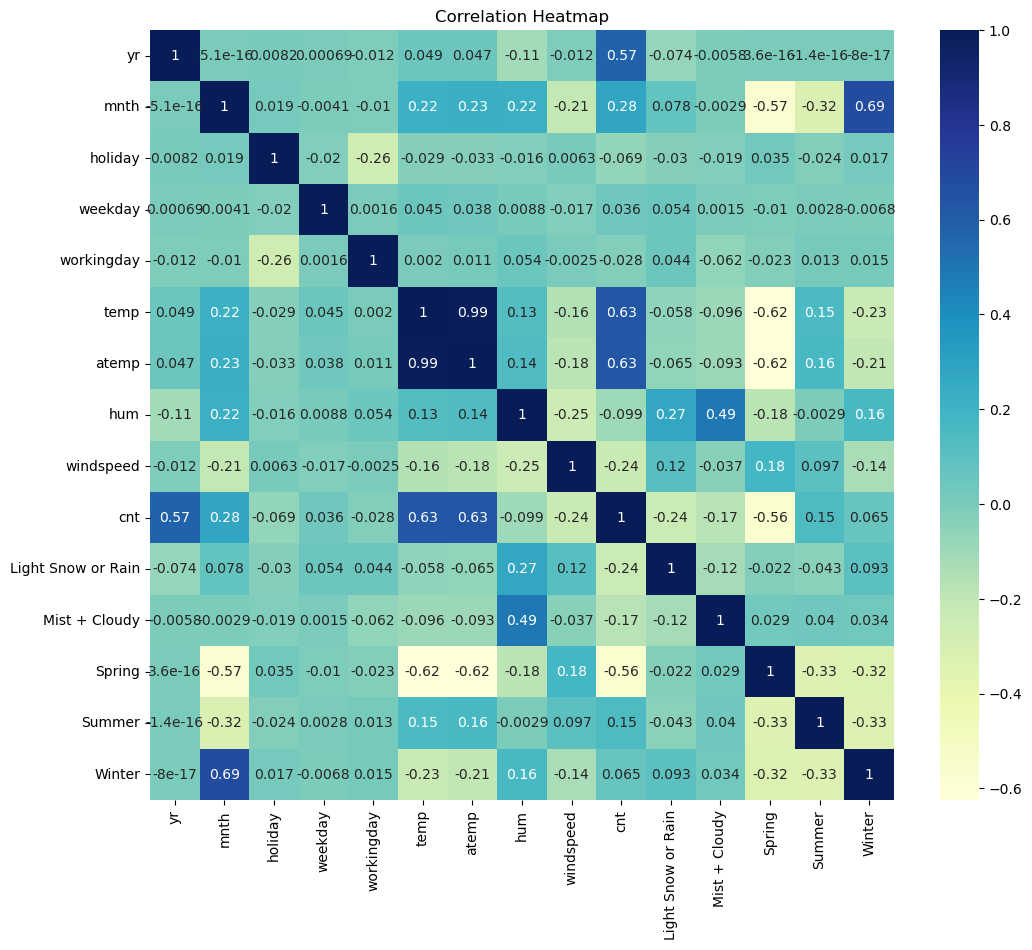

In [710]:
# Correlation Heatmap (Multivariate Analysis)
plt.figure(figsize=(12, 10))
sns.heatmap(biking.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Analysis of Categorical data with the Target Variable Cnt

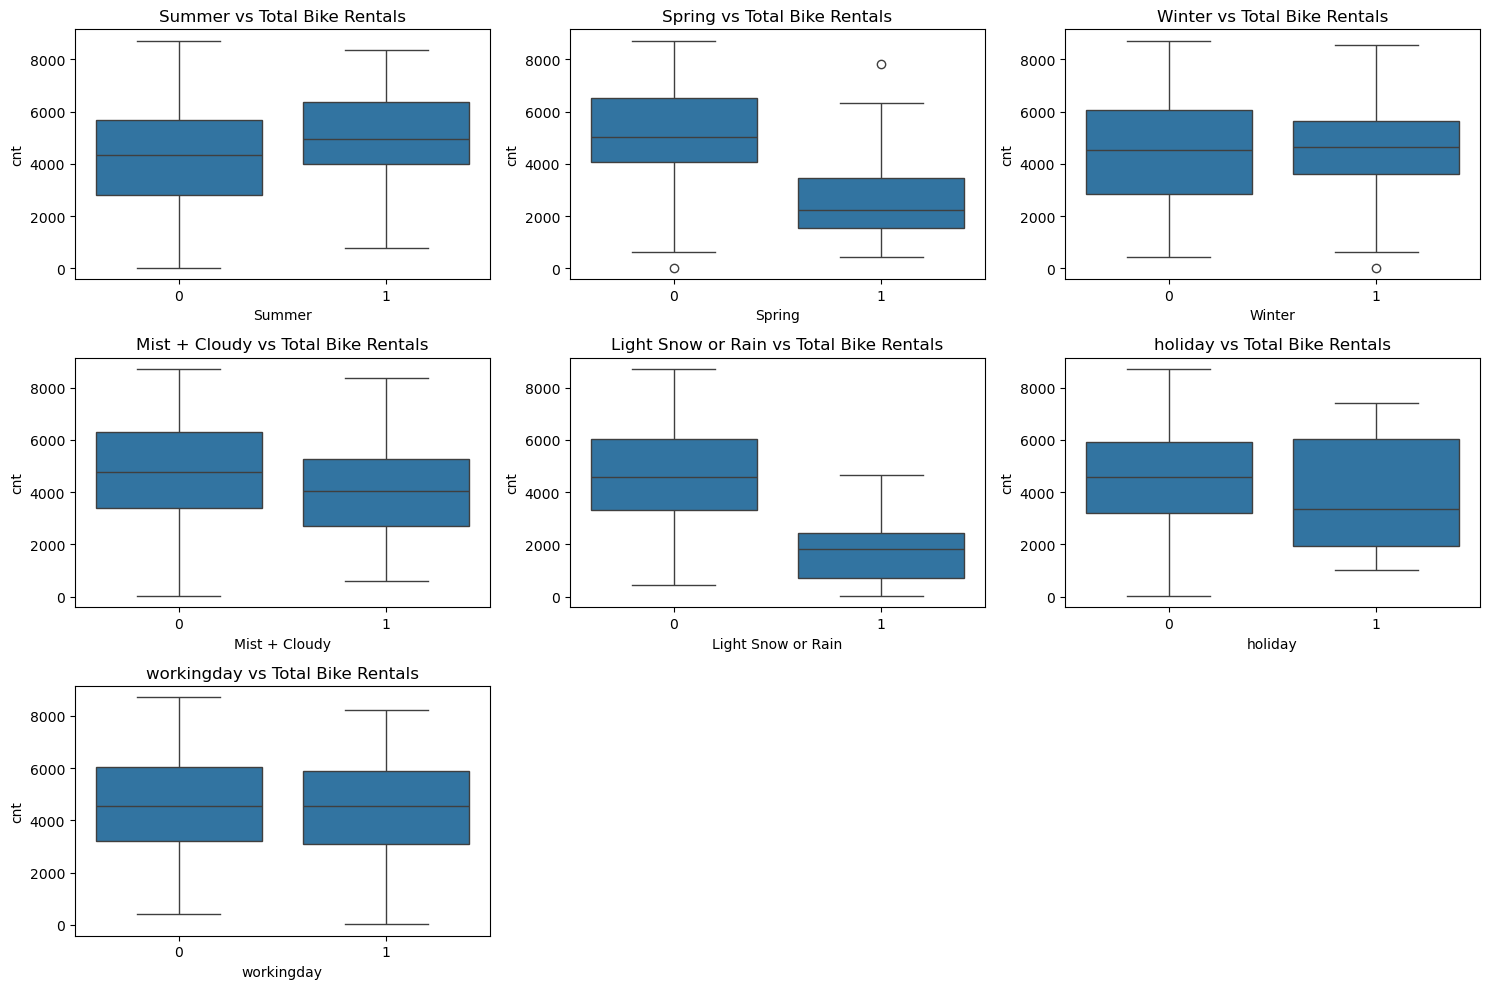

In [711]:
cat_data = ['Summer', 'Spring', 'Winter', 'Mist + Cloudy','Light Snow or Rain','holiday', 'workingday']
plt.figure(figsize=(15, 10))
for i, column in enumerate(cat_data):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=biking[column], y=biking['cnt'])
    plt.title(f'{column} vs Total Bike Rentals')
plt.tight_layout()
plt.show()

In [712]:
biking.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'Light Snow or Rain', 'Mist + Cloudy',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

## Rescaling the Features
1. very important step in the Multiple Linear Regression
2. The scales are very different , therefore the co-eff will be affected

In [1]:
from sklearn.preprocessing import MinMaxScaler ## here i have used the min-max scaler to scaler the numbers between 0-1 -This actually makes the model more accurate

In [714]:
scaler = MinMaxScaler()

### Split into Train and Test Data

In [715]:
df_train, df_test = train_test_split(biking,train_size=0.7,random_state=100)

print(df_test.shape)
print (df_train.shape)

(220, 15)
(510, 15)


In [716]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

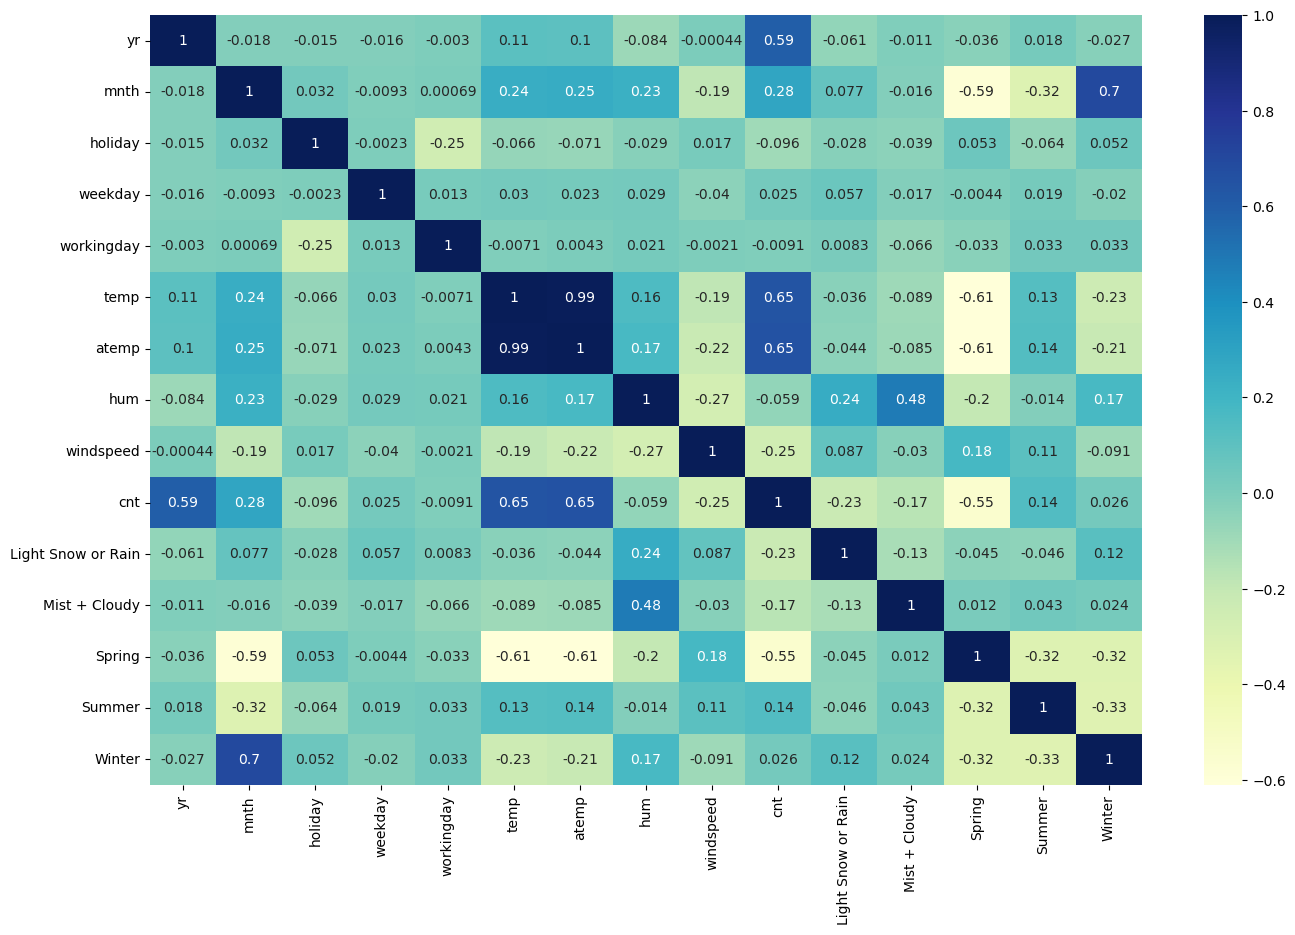

In [717]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

 ### Once the Min-Max scaling is done the heat map looks more readable and it is easier to analyse the variables that are correlated to each other. 

## DATA MODELLING

X_Train and y_train creation

In [718]:
##X_train and y_train creation from df_train

y_train = df_train.pop("cnt")
X_train = df_train

In [719]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Snow or Rain,Mist + Cloudy,Spring,Summer,Winter
576,1.0,0.545455,0.0,0.500000,1.0,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,0.181818,0.0,0.000000,0.0,0.442393,0.438975,0.640189,0.255342,0,1,1,0,0
728,1.0,1.000000,0.0,0.166667,1.0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0
482,1.0,0.272727,0.0,0.000000,0.0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0
111,0.0,0.272727,0.0,0.000000,0.0,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0


In [720]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

##### The model building can be done in two ways, one is by adding the variables one by one against the target variable. Second is adding all the variable and dropping them one by one to make the model better. Let us first see by adding the independent variable one by one

First I have used the temp variable to analyse the model

In [721]:
X_train_sm=sm.add_constant(X_train['atemp'])

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.params

const    0.162201
atemp    0.684584
dtype: float64

In [722]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           4.77e-62
Time:                        17:45:44   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here we can find the r2 value as 0.420, which seems to be lower. We can add more variables and find out if there is an increase in R2. 

### Note ; Higher the R2, better is the model

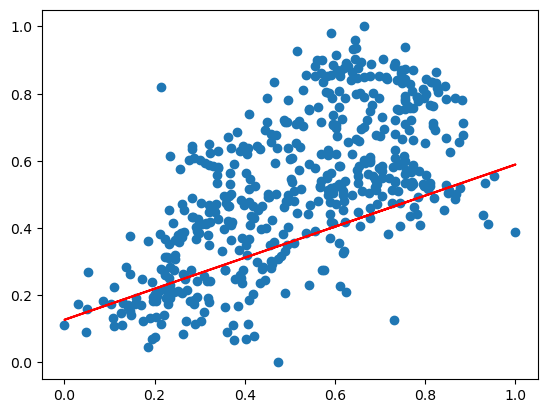

In [723]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.127 + 0.462*X_train_sm.iloc[:, 1], 'r')
plt.show()

Adding more variables to check the training data set

In [724]:
X_train_sm = X_train[["temp","windspeed"]]

X_train_sm = sm.add_constant(X_train_sm)


In [725]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const        0.240854
temp         0.615443
windspeed   -0.181118
dtype: float64

In [726]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.99e-63
Time:                        17:45:44   Log-Likelihood:                 184.13
No. Observations:                 510   AIC:                            -362.3
Df Residuals:                     507   BIC:                            -349.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2409      0.026      9.156      0.000       0.189       0.293
temp           0.6154      0.034     18.213      0.000       0.549       0.682
windspeed     -0.1811      0.045     -4.030      0.000      -0.269      -0.093
==============================================================================
Omnibus:                       10.761   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.285
Skew:                           0.155   Prob(JB):                       0.0262
Kurtosis:                       2.504   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here I have added two variables Tem and windspeed but there is no significance improvement in the R2 value

In [727]:
X_train_sm = X_train[["temp","windspeed","hum","atemp"]]

X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const        0.452085
temp         0.277905
windspeed   -0.235267
hum         -0.326560
atemp        0.389689
dtype: float64

In [728]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.06e-69
Time:                        17:45:44   Log-Likelihood:                 204.14
No. Observations:                 510   AIC:                            -398.3
Df Residuals:                     505   BIC:                            -377.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4521      0.044     10.364      0.000       0.366       0.538
temp           0.2779      0.226      1.232      0.219      -0.165       0.721
windspeed     -0.2353      0.045     -5.171      0.000      -0.325      -0.146
hum           -0.3266      0.052     -6.303      0.000      -0.428      -0.225
atemp          0.3897      0.242      1.613      0.107      -0.085       0.864
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.462
Skew:                           0.081   Prob(JB):                        0.292
Kurtosis:                       2.701   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We had added 4 variables and the R2 had slightly improved from 0.42 to 0.47

Now let us Add all variables and try removing one by one just to understand how the model works this way and identify if there are any changes in the R2 value

### Adding all the variables to the model

In [729]:
biking.columns #check for the columns in the dataset

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'Light Snow or Rain', 'Mist + Cloudy',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [730]:
##Build a linear Model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                 0.289497
yr                    0.231246
mnth                  0.017524
holiday              -0.101170
weekday               0.017627
workingday           -0.019871
temp                  0.431895
atemp                 0.062511
hum                  -0.138185
windspeed            -0.178399
Light Snow or Rain   -0.242361
Mist + Cloudy        -0.054069
Spring               -0.070143
Summer                0.046762
Winter                0.081018
dtype: float64

In [731]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.41e-179
Time:                        17:45:44   Log-Likelihood:                 489.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     495   BIC:                            -885.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2895      0

When we check the p-values it seems like some of the variables are not significant, hence we can check the VIF and identify if we can drop any

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

Import the variance inflation factor from Statsmodel

In [732]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [733]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.60
6,atemp,368.14
7,hum,31.05
1,mnth,12.29
8,windspeed,5.04
13,Winter,4.66
11,Spring,4.38
4,workingday,3.69
3,weekday,3.21
12,Summer,2.72


The P value of atemp is 0.664 hence we can drop



In [734]:
X=X_train.drop(columns="atemp")

Once dropping the variable we will once again the test the model with the summary and VIF and check how the values have been changed

In [735]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [736]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.12e-180
Time:                        17:45:44   Log-Likelihood:                 489.32
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     496   BIC:                            -891.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2891      0

Dropping atemp does not affect the R2 value of the model. 

In [737]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,31.01
5,temp,16.57
1,mnth,12.29
7,windspeed,4.80
12,Winter,4.53
10,Spring,4.32
4,workingday,3.68
3,weekday,3.19
11,Summer,2.62
9,Mist + Cloudy,2.36


Dropping month as it has a VIF of 12.29 and p-value of 0.5

Let us drop month and check if this variable has any effect on the model

In [738]:
X=X.drop(columns="mnth")

In [739]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [740]:

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          9.69e-182
Time:                        17:45:44   Log-Likelihood:                 489.09
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     497   BIC:                            -897.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2978      0

The model again shows that removing mnth has no effect on the r values but there are changes in the VIF values and changes in the co-eff

In [741]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,28.31
4,temp,15.27
6,windspeed,4.68
9,Spring,3.85
3,workingday,3.67
2,weekday,3.18
11,Winter,3.11
8,Mist + Cloudy,2.33
10,Summer,2.29
0,yr,2.08


I have chosen to drop hum (humidity) as i can see this is significantly affecting the overall model and it has a very high VIF. Also there are other factors like temp, summer, winter etc which will still show the effect of climate and temperature on the demand of bikes so I have chosen to drop hum

In [742]:
X= X.drop(columns=["hum"])

In [743]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [744]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          2.29e-180
Time:                        17:45:44   Log-Likelihood:                 483.04
No. Observations:                 510   AIC:                            -942.1
Df Residuals:                     498   BIC:                            -891.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2315      0

In [745]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.36
5,windspeed,4.62
3,workingday,3.54
2,weekday,3.15
8,Spring,2.37
0,yr,2.07
9,Summer,1.92
10,Winter,1.88
7,Mist + Cloudy,1.53
1,holiday,1.11


Dropping hum again had no significant effect on R2 as it stays on the higher side. But it has a good impact on the VIF values of all the independent variables.

## Step 7: Residual Analysis of the train data


Check if the error is normally distributed as it is required for a good LR model

In [746]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

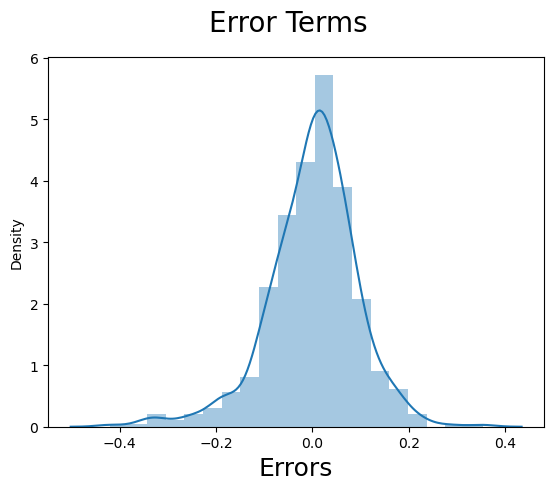

In [747]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are normally distributed and the values have mean of zero

### Making the Predictions on the Final Model

lets scale the test dataset

In [748]:
###Making Predictions Using the Final Model

num_vars = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [749]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow or Rain,Mist + Cloudy,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.516667,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.311120,0.187620,0.342307,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the dataset into X and Y - Target variable is cnt is Y

In [750]:
##Dividing X and Y

y_test = df_test.pop('cnt')
X_test = df_test

Adding the constant

In [751]:
X_test_m4 = sm.add_constant(X_test)

Dropping the columns that do not support the validity of the model

In [752]:
X_test_m4 = X_test_m4.drop(columns=["hum", "atemp","mnth"])

Predicting the model

In [753]:
y_pred_m4 = lr_3.predict(X_test_m4)

### Evaluation of the Model

Now let us check how the actual vs predicted model works

Text(0, 0.5, 'y_pred')

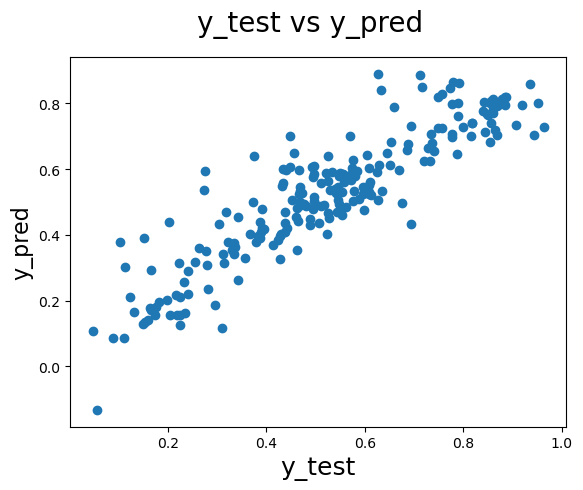

In [754]:
#Model Evaluation

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

based on the above model

The equation of the best fitted line can be shown as below

$ Demand (cnt)=0.247×yr−0.1105×holiday+0.0234×weekday−0.0242×workingday +0.4635 ×temp −0.1732×windspeed−0.2942×Light Snow or Rain−0.0874×Mist + Cloudy−0.3137×Spring−0.0576×Summer−0.0862×Winter $

Around a 45-degree diagonal line, the points show a substantially linear trend, suggesting that the forecasts and actual values are rather similar.


The clustering around the diagonal line indicates a good model fit, albeit considerable scatter. There is some variation, though, which suggests room for development.


Instances when the model is less accurate are indicated as outliers or spots that are distant from the diagonal line. These ought to be examined for possible enhancements.


Majorly R2 is 0.825 

The model captures most of the underlying patterns in the data and yet there is still room for improvement. The R2 value is a fair number. 

For improved analyses we can consider to add more feature variable that will have a higher impact of the target variable

We can consider features like

1. Population
2. Day of the week
3. Fuel Prices
4. Time of the day and so on